In [3]:
# Model evaluation
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_diabetes, load_iris, make_classification
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score



In [4]:
# 11.1 Cross-validating models
digits = datasets.load_digits()
features = digits.data 
target = digits.target 
standardizer = StandardScaler()
logit = LogisticRegression()
pipeline = make_pipeline(standardizer, logit)
kf = KFold(n_splits=10, shuffle = True, random_state = 1)
cv_results = cross_val_score(pipeline, 
                            features, 
                            target, 
                            cv = kf, 
                            scoring = "accuracy", 
                            n_jobs = -1)

cv_results.mean()

# kfold cross-validation
# we split the data intro k parts called folds
# The model is then trained suing k - 1 folds - combined into training set - and then 
# the last fold as the test set 
# The performance on the model for each of the k oiterations is then averaged to produce an 
# overall measurement.




np.float64(0.9699472377405337)

In [5]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98888889, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [6]:
# # important points:
# 1. Assume each observation was created independent from the others (IID)

# 2. when we use KFCV to evaluate a classifier, it is often beneficial to have folds 
# containing roughly the same percentage of observations from each of the different 
# target classes (stratified cross-validation)

# 3. when using validation sets or cross-validation, it is important to preprocess 
# data based on the training set and then apply those transformations to both 
# the training and test sets. 


In [7]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.1, 
                                                                            random_state = 1)
standardizer.fit(features_train)
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)


In [8]:
pipeline = make_pipeline(standardizer, logit)
cv_results = cross_val_score(pipeline, 
                             features, 
                             target, 
                             cv=kf, 
                             scoring="accuracy", 
                             n_jobs = -1)


In [9]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98888889, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [10]:
# 11.2 creating a baseline regression model 
diabetes = load_diabetes()
features, target = diabetes.data, diabetes.target 
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state = 1)

dummy = DummyRegressor(strategy="mean")
dummy.fit(features_train, target_train)
dummy.score(features_test, target_test)

-0.007035918242200845

In [11]:
# to compare, we trian our model and evaluate the performance score 
ols = LinearRegression() 
ols.fit(features_train, target_train)

ols.score(features_test, target_test)

0.4439690125828355

In [12]:
clf = DummyRegressor(strategy="constant", constant=20)
clf.fit(features_train, target_train)
clf.score(features_test, target_test)




-3.1181539467984978

<img src="./assets/r_square.png">

In [13]:
# 11.3 Creating a baseline classification Model 
iris = load_iris() 
features, target = iris.data, iris.target 

features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state = 0
)

clf = DummyClassifier(strategy="uniform")
clf.fit(features_train, target_train)
clf.score(features_test, target_test)


0.3157894736842105

In [14]:
classifier = RandomForestClassifier()
classifier.fit(features_train, target_train)
classifier.score(features_test, target_test)

0.9736842105263158

In [15]:
# 11.4 Evaluating Binary Classifer Predictions 
x,y = make_classification(n_samples = 100000, 
                          n_features=3, 
                          n_informative = 3, 
                          n_redundant = 0, 
                          n_classes = 2, 
                          random_state = 1)
logit = LogisticRegression()
cross_val_score(logit, x, y, scoring="accuracy")


array([0.9322 , 0.933  , 0.9359 , 0.93375, 0.93705])

<img src="./assets/accuracy.png">

In [16]:
x, y = make_classification(n_samples = 10000, 
                           n_features = 3, 
                           n_informative = 3, 
                           n_redundant = 0, 
                           n_classes = 2, 
                           random_state = 1)
logit = LogisticRegression() 
cross_val_score(logit, x, y, scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [17]:
cross_val_score(logit, x, y, scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

<img src="./assets/precision.png">

In [18]:
cross_val_score(logit, x, y, scoring="recall")


array([0.951, 0.952, 0.953, 0.949, 0.951])

<img src="./assets/recall_1.png">
<img src="./assets/recall_2.png">

In [19]:
cross_val_score(logit, x, y, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

<img src="./assets/f1.png">

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.1, 
                                                    random_state = 1
                                                    )

In [21]:
y_hat = logit.fit(x_train, y_train).predict(x_test)
accuracy_score(y_test, y_hat)

0.947

In [22]:
# 11.5 evaluating binary classifier threshold 

# The receiving Operating Characteristic (ROC) curve is a common method 
# for evaluating the quality of a binary classifier.
# It compares the pressence of true positives and false positives at 
# every probability threshold. 

features, target = make_classification(n_samples = 10000, 
                                       n_features = 10, 
                                       n_classes = 2, 
                                       n_informative = 3, 
                                       random_state = 3)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.1, random_state = 1
)


In [23]:
logit = LogisticRegression() 
logit.fit(features_train, target_train)
target_probabilities = logit.predict_proba(features_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(
    target_test, 
    target_probabilities
)

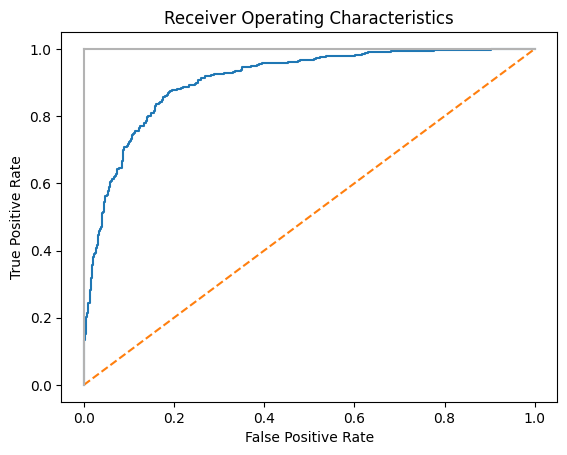

In [24]:
plt.title("Receiver Operating Characteristics")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls='--')
plt.plot([0, 0], [1, 0], c='0.7')
plt.plot([1, 1], c='.7')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show() 

In [25]:
logit.predict_proba(features_test)[0:1]

array([[0.8689235, 0.1310765]])

In [26]:
logit.classes_

array([0, 1])

<img src="./assets/TPR_FPR.png">

In [27]:
print("Threshold ", threshold[45])
print("True Positive Rate: ", true_positive_rate[45])
print("False Positive Rate: ", false_positive_rate[45])

Threshold  0.8188970072541014
True Positive Rate:  0.5448979591836735
False Positive Rate:  0.047058823529411764


In [28]:
roc_auc_score(target_test, target_probabilities)

np.float64(0.9073429371748699)

In [29]:
# 11.6 Evaluating multiclass classifier predictioins 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import make_classification 

features, target = make_classification(
    n_samples = 10000, 
    n_features = 3, 
    n_informative = 3, 
    n_redundant = 0, 
    n_classes = 3, 
    random_state = 1
)

logit = LogisticRegression() 
cross_val_score(logit, features, target, scoring="accuracy")

array([0.8405, 0.829 , 0.827 , 0.8155, 0.8205])

In [31]:
# Accuracy is number of correct predictions divided by the number 
# of observations and works just as well in the milticlass 
# as abinary setting
cross_val_score(logit, features, target, scoring="f1_macro")

array([0.84012014, 0.82895312, 0.82675308, 0.81515121, 0.82042629])

In [33]:
# macro refers to the method used to average the evaluation score
# from the classes: 
# macro: mean of metric scores for each class, weighting each class equally
# mean of metric scores for each class, weighting each class proportional 
# to its size in the data 
# micro: mean of metric scores for each observation-class combination.


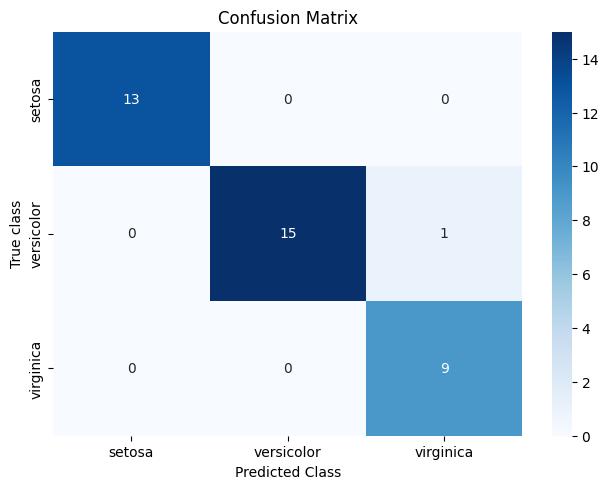

In [35]:
# Visualizing a classifier's performance 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import datasets 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
import pandas as pd 

iris = datasets.load_iris() 
features = iris.data 
target = iris.target 
class_names = iris.target_names 

feature_train, feature_test, target_train, target_test = train_test_split(
    features, target, random_state = 1
)

classifier = LogisticRegression() 

target_predicted = classifier.fit(feature_train, target_train).predict(feature_test)

matrix = confusion_matrix(target_test, target_predicted)

dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(dataframe, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout() 
plt.ylabel("True class")
plt.xlabel("Predicted Class")
plt.show()



In [39]:
# 11.8 Evaluating regression models 
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression

features, target = make_regression( n_samples = 100, 
                                   n_features = 3, 
                                   n_informative = 3, 
                                   n_targets = 1, 
                                   noise = 50, 
                                   coef = False, 
                                   random_state = 1
                                   )
# Create a linear regression object 
ols = LinearRegression() 

cross_val_score(ols, features, target, scoring="neg_mean_squared_error")


array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

<img src="./assets/mse.png">

In [40]:
# 11.9 Evaluating Clustering Models

import numpy as np 
from sklearn.metrics import silhouette_score 
from sklearn import datasets
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs

features, _ = make_blobs(n_samples = 1000, 
                         n_features = 10, 
                         centers = 2, 
                         cluster_std = 0.5, 
                         shuffle = True, 
                         random_state = 1)

model = KMeans(n_clusters = 2, random_state= 1).fit(features)

# get predicted classes
target_predicted = model.labels_

# evaluate model 
silhouette_score(features, target_predicted)


np.float64(0.8916265564072142)

<img src="./assets/silhouette.png">

In [41]:
# 11.10 Creating a custom evaluation metric 
from sklearn.metrics import make_scorer, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge 
from sklearn.datasets import make_regression 

features, target = make_regression(n_samples = 1000, 
                                   n_features = 3, 
                                   random_state = 1 
                                   )

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state = 1
)

def custom_metric(target_test, target_predicted):
    r2 = r2_score(target_test, target_predicted)
    return r2

score = make_scorer(custom_metric, greater_is_better = True)
classifier = Ridge() 

model = classifier.fit(features_train, target_train)

score(model, features_test, target_test)


0.9999986456090798

In [43]:
target_predicted = model.predict(features_test)
r2_score(target_test, target_predicted)

0.9999986456090798

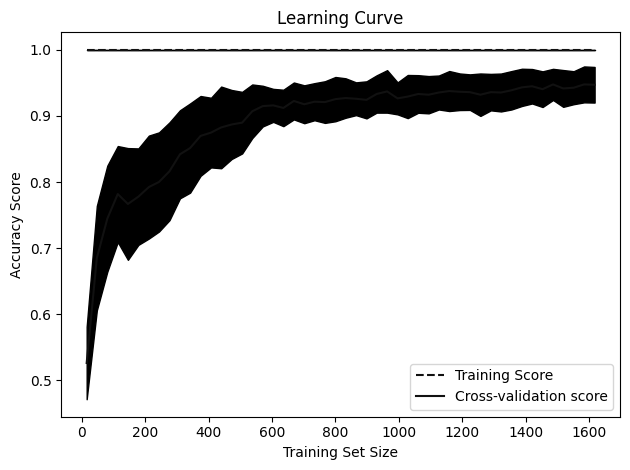

In [ ]:
# 11.11 Visualizing the effect of training set size 

import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import learning_curve 
from sklearn.datasets import load_digits

digits = load_digits()

features, target = digits.data, digits.target 

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(), 
    features, 
    target, cv=10, scoring="accuracy", n_jobs=-1, 
    train_sizes = np.linspace(0.01, 1.0, 50)
)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, "--", color="#111111", label="Training Score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#000000")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#000000")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
# Learning curve visualize the performance of a moel on the 
# training set and during cross-validarion as the number of 
# observation in the training set increases. 

In [46]:
# 11.12 Creating a text report or evaluation metrics
from sklearn import datasets 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

iris = datasets.load_iris() 
features, target = iris.data, iris.target

class_names = iris.target_names

features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state = 1
)

classifier = LogisticRegression() 
model = classifier.fit(features_train, target_train)
target_predict = model.predict(features_test)

print(classification_report(target_test, 
                            target_predict, 
                            target_names=class_names))



              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



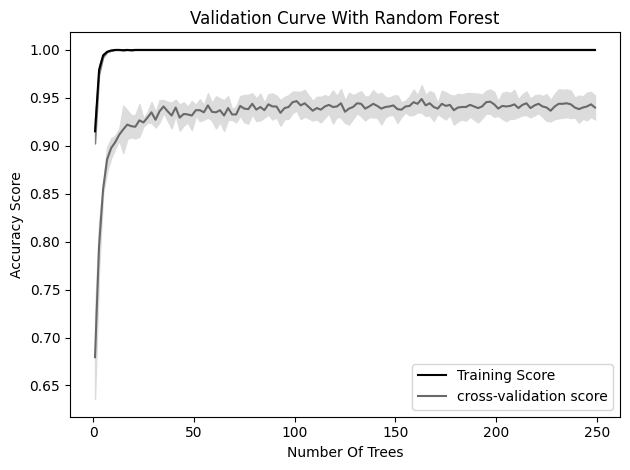

In [48]:
# 11.13 visualizing the effect of hyperparameter values 

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import validation_curve 

digits = datasets.load_digits() 
features, target = digits.data, digits.target 

param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(
    RandomForestClassifier(), 
    features, 
    target, 
    param_name="n_estimators", 
    param_range = param_range, 
    cv=3, 
    scoring="accuracy", 
    n_jobs = -1
)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(param_range, train_mean, label="Training Score", color="black")
plt.plot(param_range, test_mean, label="cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()
